In [10]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [5]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('final_data.csv')
df.iloc[0]


player                 /david-de-gea/profil/spieler/59377
team                                    Manchester United
name                                         David de Gea
position                                       Goalkeeper
height                                              189.0
age                                                  32.0
appearance                                            104
goals                                                 0.0
assists                                               0.0
yellow cards                                     0.009585
second yellow cards                                   0.0
red cards                                             0.0
goals conceded                                   1.217252
clean sheets                                     0.335463
minutes played                                       9390
days_injured                                           42
games_injured                                           5
award         

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [6]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [11]:
df.shape

(10754, 22)

In [14]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [13]:
df.describe(include='object')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
# from kaggle 
#We had gathered information on players competing in several top-tier global football leagues:

#11 European leagues, including the Premier League and Championship in England, Bundesliga in Germany, La Liga in Spain, Serie A in Italy, Ligue 1 in France, Eredivisie in the Netherlands, Liga NOS in Portugal, Premier Liga in Russia, Super Lig in Turkey, and Bundesliga in Austria.

#4 American leagues, including Brasileiro in Brazil, Major League Soccer in the United States, Primera División in Argentina, and Liga MX in Mexico.

#1 African league, namely the DStv Premiership in South Africa.

#4 Asian leagues, comprising J-League in Japan, Saudi Pro League in Saudi Arabia, K-League 1 in South Korea, and A-League in Australia.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# it's not up-to-date (in 2 season 2021-2022 and 2022-2023) the dataset is behind by one season 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [ ]:
# we only have one data source 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [ ]:
# the data is highly relevant for predecting the price of the player it has many feature that can detremen the player's value in the market

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [ ]:
# the dataset has no duplicated rows
df.duplicated().sum()


0

In [19]:
"""Since the dataset covers two seasons, players may have switched teams. Without a unique identifier, 
we need to find a stable feature to track them.

The most consistent attributes are likely:

Name – Usually unchanged, but spelling variations can occur.
Height – A fixed physical trait.

Other details, like team and jersey number, change easily. Position might shift under a new manager."""

df[df.duplicated(['name', 'height'], keep=False)].sort_values(by='name')

"""Based on the output, we have only around 12 players. However, our filtering method wasn't perfect. For example,
 Luis Díaz has a two-year age difference, which isn’t possible, meaning they are not the same player. Similarly, 
 Pedrinho has a 13-year gap, confirming they are different individuals.

This pattern appears across all players, indicating inconsistencies in our approach.
 However, Adama Traoré remains the same player despite switching teams, so we will keep him, 
 as the team he plays for might influence his value."""
df[df.duplicated(['name', 'height'], keep=False)].sort_values(by='name')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
126,/adama-traore/profil/spieler/204103,Wolverhampton Wanderers,Adama Traoré,Attack-RightWinger,178.0,27.0,80,0.095541,0.143312,0.071656,...,0.0,0.0,3768,200,25,2,12000000,40000000,4,1
5249,/adama-traore/profil/spieler/262608,Hull City,Adama Traoré,midfield-AttackingMidfield,178.0,27.0,30,0.083994,0.209986,0.167989,...,0.0,0.0,2143,1045,167,1,3000000,10000000,3,0
3510,/edutm/profil/spieler/371250,Goiás Esporte Clube,Edu,Defender Centre-Back,185.0,22.0,2,0.000000,0.000000,0.000000,...,0.0,0.0,92,0,0,0,500000,500000,2,0
4171,/edutm/profil/spieler/841731,GD Chaves,Edu,Defender Centre-Back,185.0,21.0,5,0.000000,0.000000,0.000000,...,0.0,0.0,119,0,0,0,200000,200000,2,0
3595,/eduardo/profil/spieler/110078,Botafogo de Futebol e Regatas,Eduardo,midfield-AttackingMidfield,184.0,33.0,35,0.294438,0.163577,0.196292,...,0.0,0.0,2751,262,36,10,1500000,6000000,3,0
8335,/eduardo/profil/spieler/218138,Yokohama F. Marinos,Eduardo,Defender Centre-Back,184.0,30.0,12,0.000000,0.203620,0.101810,...,0.0,0.0,884,283,33,4,800000,925000,2,0
4644,/jorge-rodriguez/profil/spieler/854360,Deportivo Toluca,Jorge Rodríguez,Defender Left-Back,179.0,21.0,54,0.054595,0.000000,0.272975,...,0.0,0.0,3297,0,0,0,600000,700000,2,1
7638,/jorge-rodriguez/profil/spieler/333760,Club Estudiantes de La Plata,Jorge Rodríguez,midfield-DefensiveMidfield,179.0,27.0,5,0.000000,0.000000,0.000000,...,0.0,0.0,450,14,3,0,3500000,3500000,3,0
396,/luis-diaz/profil/spieler/480692,Liverpool FC,Luis Díaz,Attack-LeftWinger,180.0,26.0,75,0.456853,0.236887,0.084602,...,0.0,0.0,5319,227,39,11,75000000,75000000,4,1
6955,/luis-diaz/profil/spieler/538984,Columbus Crew,Luis Díaz,midfield-RightMidfield,180.0,24.0,2,0.000000,0.000000,0.000000,...,0.0,0.0,90,149,21,2,2000000,2000000,3,1


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [ ]:
# no null values in the dataset 
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [ ]:
# I will analyze the logical meaning of each column and identify any irregular entries.
columns_to_check = [
    "age", "appearance", "goals", "assists", "yellow cards", "second yellow cards", "red cards",
    "goals conceded", "clean sheets", "minutes played", "days_injured", "games_injured",
    "current_value", "highest_value", "position_encoded", "winger"
]
# there are no negitive values
negative_values = df[df[columns_to_check].lt(0).any(axis=1)]
negative_values


,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [23]:
# check columns types 
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [ ]:
# all of them seems correct 

In [3]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

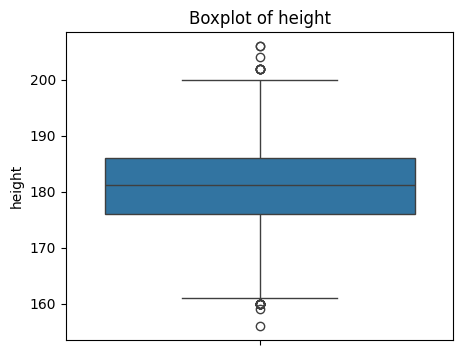

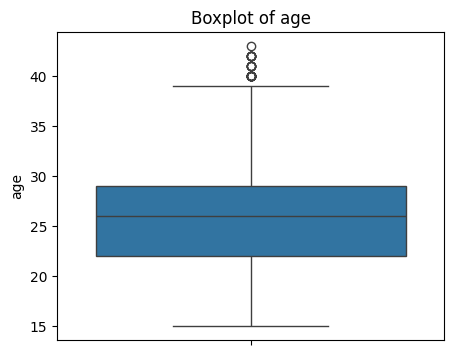

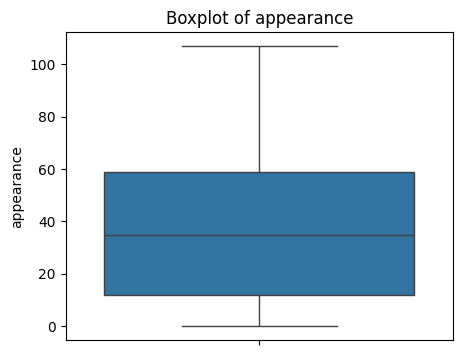

In [28]:
cols_to_check = ['height', 'age', 'appearance']

# Create a separate boxplot for each column
for col in cols_to_check:
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [34]:
df = df[df['age'] <= 40]
df = df[df['appearance'] >= 10]

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [80]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


Correlation Matrix:
                 height       age  appearance  current_value
height         1.000000  0.042499    0.080569       0.048730
age            0.042499  1.000000    0.091899      -0.083152
appearance     0.080569  0.091899    1.000000       0.415190
current_value  0.048730 -0.083152    0.415190       1.000000


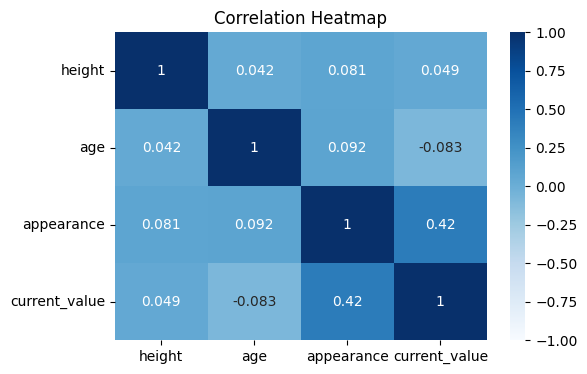

In [ ]:
import numpy as np

# Compute correlation on numeric columns
corr_matrix = df[cols].corr()

print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

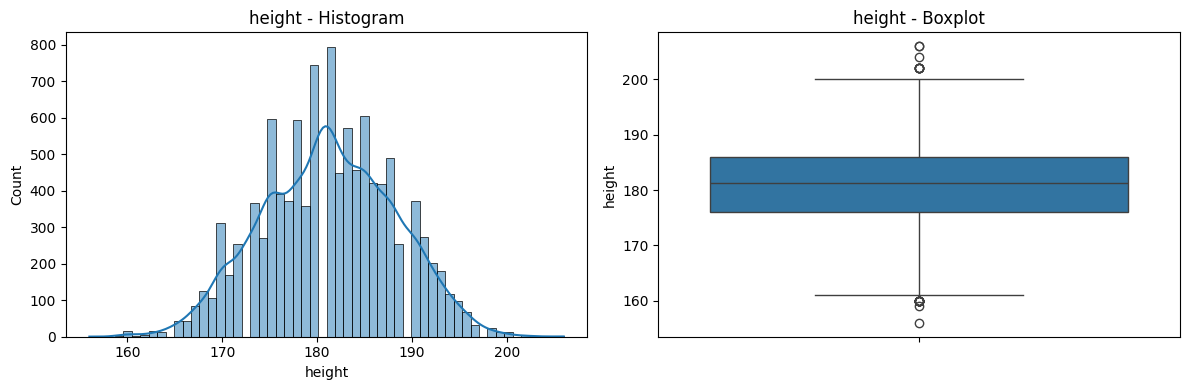

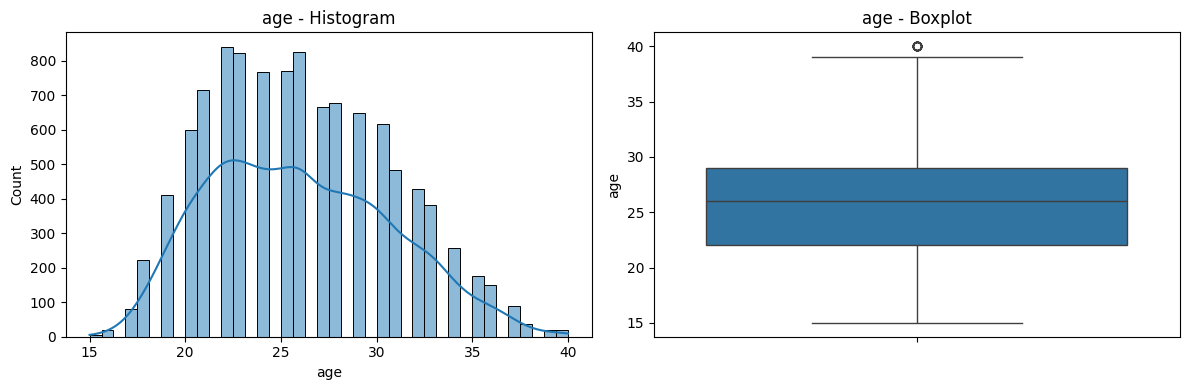

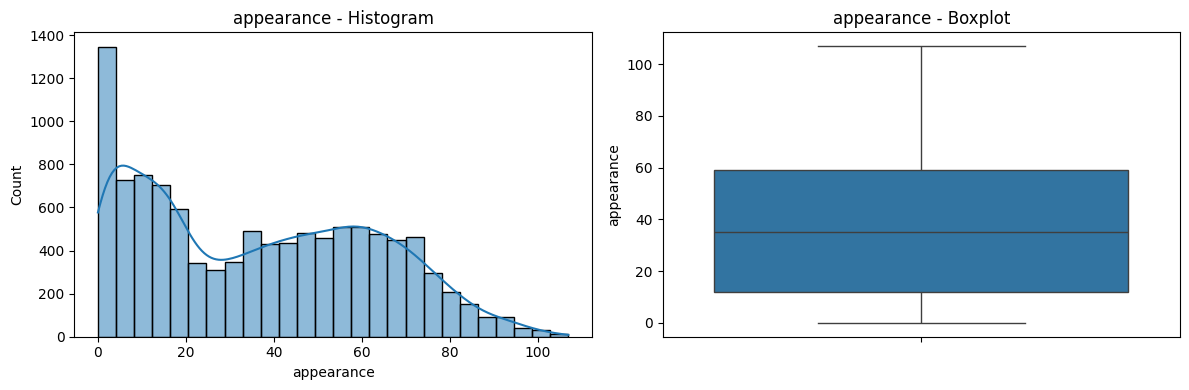

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8468 entries, 0 to 10753
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               8468 non-null   object 
 1   team                 8468 non-null   object 
 2   name                 8468 non-null   object 
 3   position             8468 non-null   object 
 4   height               8468 non-null   float64
 5   age                  8468 non-null   float64
 6   appearance           8468 non-null   int64  
 7   goals                8468 non-null   float64
 8   assists              8468 non-null   float64
 9   yellow cards         8468 non-null   float64
 10  second yellow cards  8468 non-null   float64
 11  red cards            8468 non-null   float64
 12  goals conceded       8468 non-null   float64
 13  clean sheets         8468 non-null   float64
 14  minutes played       8468 non-null   int64  
 15  days_injured         8468 non-null   int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score


features = [
    'age', 'height', 'appearance', 'goals',
    'assists', 'clean sheets', 'days_injured',
    'games_injured', 'award', 'winger'
]

target = 'current_value_log'


In [81]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:

scaler = StandardScaler()
scaler.fit(X_train)          
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)



In [83]:

model = SGDRegressor(
    learning_rate='constant',
    eta0=0.01,     
    max_iter=1000, 
    tol=1e-3,
    random_state=42
)

model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training RMSE (log-scale): {train_rmse:.3f}")
print(f"Training R^2 (log-scale):  {train_r2:.3f}")


Training RMSE (log-scale): 1.503
Training R^2 (log-scale):  0.302


In [ ]:
y_test_pred = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE (log-scale): {test_rmse:.3f}")
print(f"Test R^2 (log-scale):  {test_r2:.3f}")


Test RMSE (log-scale): 1.459
Test R^2 (log-scale):  0.328


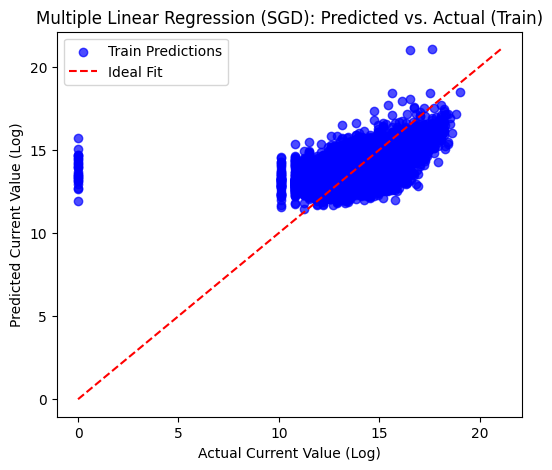

In [ ]:

plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue', label='Train Predictions')
plt.xlabel('Actual Current Value (Log)')
plt.ylabel('Predicted Current Value (Log)')
plt.title('Multiple Linear Regression (SGD): Predicted vs. Actual (Train)')

min_val = min(y_train.min(), y_train_pred.min())
max_val = max(y_train.max(), y_train_pred.max())
plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linestyle='--', label='Ideal Fit')

plt.legend()
plt.show()



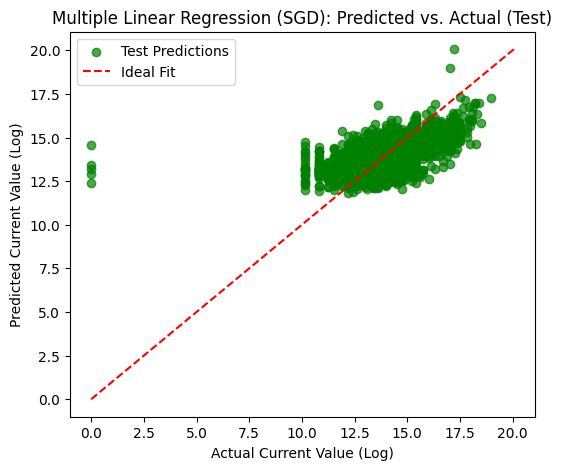

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green', label='Test Predictions')
plt.xlabel('Actual Current Value (Log)')
plt.ylabel('Predicted Current Value (Log)')
plt.title('Multiple Linear Regression (SGD): Predicted vs. Actual (Test)')

min_val_test = min(y_test.min(), y_test_pred.min())
max_val_test = max(y_test.max(), y_test_pred.max())
plt.plot([min_val_test, max_val_test], [min_val_test, max_val_test],
         color='red', linestyle='--', label='Ideal Fit')

plt.legend()
plt.show()
